In [336]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [350]:
data1 = pd.read_csv("data.csv")
data2 = pd.read_csv("dataset.csv")
data2.rename(columns={"language":"Language"}, inplace=True)
data = pd.merge(data1, data2, how='outer')

In [338]:
# data = data.drop(data[data.Language == 'English'].index)
# data = data.drop(data[data.Language == 'French'].index)

In [339]:
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
32332,hors du terrain les années et sont des année...,French
32333,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
32334,con motivo de la celebración del septuagésimoq...,Spanish
32335,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 757.9+ KB


In [341]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [342]:
data.tail()

,Text,Language
32332,hors du terrain les années et sont des année...,French
32333,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
32334,con motivo de la celebración del septuagésimoq...,Spanish
32335,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
32336,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [343]:
data[data['Language']=='French']

,Text,Language
3250,Si vous disposez d'ouvrages ou d'articles de r...,French
3251,Comment ajouter mes sources ?,French
3252,Cette page ou section est en train d'être trad...,French
3253,Vous pouvez aider au développement de Wikipédi...,French
3254,Le mot nature est un terme polysémique (c’est-...,French
...,...,...
32222,le pays de france a connu une occupation humai...,French
32317,résistant et gaulliste il est garde des sceaux...,French
32318,notices dans des bases relatives au sport ass...,French
32321,le village est une station familiale de sports...,French


In [344]:
data.Language.value_counts()

English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Persian       1000
Pushto        1000
Thai          1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Japanese      1000
Romanian      1000
Swedish       1000
Estonian      1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: Language, dtype: int64

In [345]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [346]:
x = np.array(data["Text"])
y = np.array(data["Language"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state = 42)

In [347]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9345952023988006

In [348]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: 第１条 すべての人間は、生まれながらにして自由であり、かつ、尊厳と権利とについて平等である。人間は、理性と良心とを授けられており、互いに同胞の精神をもって行動しなければならない。  第２条 すべて人は、人種、皮膚の色、性、言語、宗教、政治上その他の意見、国民的もしくは社会的出身、財産、門地その他の地位又はこれに類するいかなる自由による差別をも受けることなく、この宣言に掲げるすべての権利と自由とを享有することができる。 さらに、個人の属する国又は地域が独立国であると、信託統治地域であると、非自治地域であると、又は他のなんらかの主権制限の下にあるとを問わず、その国又は地域の政治上、管轄上又は国際上の地位に基ずくいかなる差別もしてはならない。
['Japanese']


## Model Evaluation

In [358]:
labels = list(set(data.Language.tolist()))

Accuracy:  0.9345952023988006


Text(151.5, 0.5, 'Actual Labels')

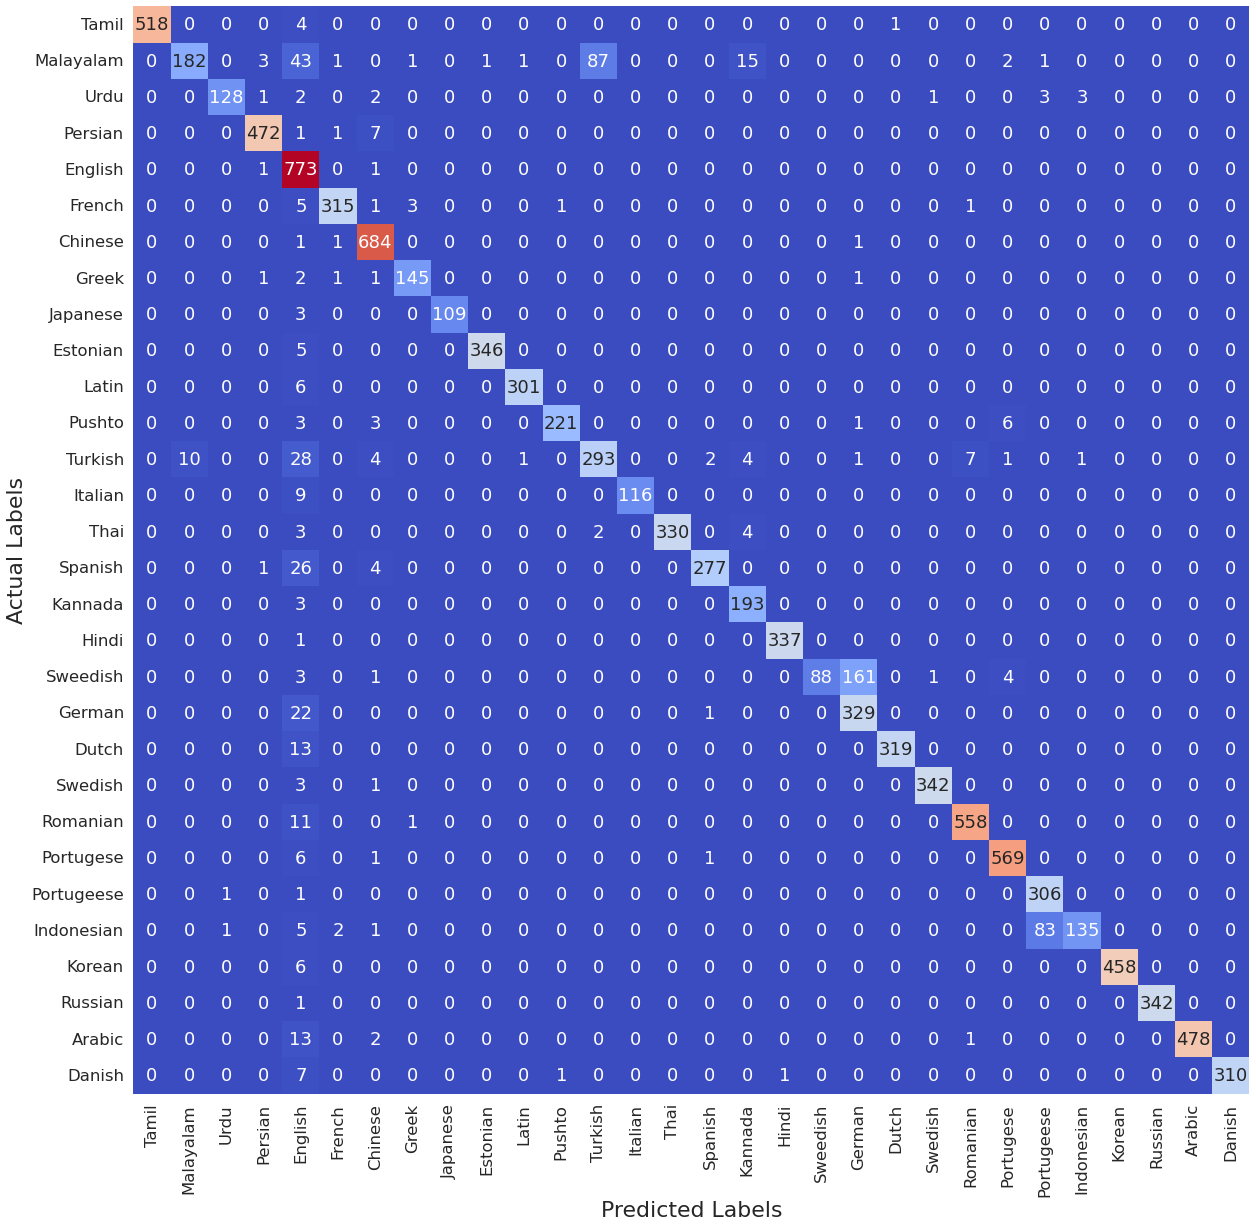

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

#Get predictions on test set
labels = model.predict(X_test)
# predictions = encoder.inverse_transform(labels)

#Accuracy on test set
accuracy = accuracy_score(y_test,labels)
print("Accuracy: ",accuracy)

# #Create confusion matrix
# labels = ['deu', 'eng', 'fra', 'ita', 'por', 'spa']
conf_matrix = confusion_matrix(y_test,labels)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

#Plot confusion matrix heatmap
plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Labels',fontsize=22)
plt.ylabel('Actual Labels',fontsize=22)
# view raw